### Import libraries

In [1]:
import os
import requests
from datetime import datetime, timedelta
from glob import glob
import pandas as pd
import csv
import numpy as np

### load and combine csvs
### then save to csv

In [2]:
#csv_files = glob("./MISO_quarterly_data/*DA*.csv")  

In [3]:
"""import re
from io import StringIO

def clean_file(path):
    with open(path, "r") as fh:
        txt = fh.read()
    # remove commas *inside* numbers (e.g. 1,234.56 → 1234.56)
    return re.sub(r'(?<=\d),(?=\d{3}(?:\.\d+)?\b)', '', txt)

dfs = {}
for f in csv_files:
    clean_txt = clean_file(f)
    temp_df = pd.read_csv(StringIO(clean_txt), low_memory=False)
    dfs[f] = temp_df[temp_df['NODE'] == 'NSP.NWELOAD']
"""

'import re\nfrom io import StringIO\n\ndef clean_file(path):\n    with open(path, "r") as fh:\n        txt = fh.read()\n    # remove commas *inside* numbers (e.g. 1,234.56 → 1234.56)\n    return re.sub(r\'(?<=\\d),(?=\\d{3}(?:\\.\\d+)?\x08)\', \'\', txt)\n\ndfs = {}\nfor f in csv_files:\n    clean_txt = clean_file(f)\n    temp_df = pd.read_csv(StringIO(clean_txt), low_memory=False)\n    dfs[f] = temp_df[temp_df[\'NODE\'] == \'NSP.NWELOAD\']\n'

In [4]:
#combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
#combined_df.to_csv("./data_gold/Node_DA.csv")

## explore RT node data

In [6]:
node_RT = pd.read_csv("data_gold/Node_RT.csv")
node_DA = pd.read_csv("data_gold/Node_DA.csv")

In [7]:
node_RT_LMP = node_RT[node_RT['VALUE'] == 'LMP']
node_RT_LMP = node_RT_LMP.drop(columns=node_RT_LMP.columns[0])#.set_index('MARKET_DAY')

node_DA_LMP = node_DA[node_DA['VALUE'] == 'LMP']
node_DA_LMP = node_DA_LMP.drop(columns=node_DA_LMP.columns[0])#.set_index('MARKET_DAY')

In [8]:
node_RT_LMP

,MARKET_DAY,NODE,TYPE,VALUE,HE1,HE2,HE3,HE4,HE5,HE6,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,10/1/2022,NSP.NWELOAD,Loadzone,LMP,17.69,13.95,22.03,33.19,39.61,42.65,...,48.88,53.17,47.95,50.86,52.23,46.37,38.11,35.04,22.29,24.85
3,10/2/2022,NSP.NWELOAD,Loadzone,LMP,13.95,24.15,23.93,23.76,24.22,26.24,...,40.84,38.83,46.88,57.03,50.22,46.5,27.70,3.76,-3.77,-5.24
6,10/3/2022,NSP.NWELOAD,Loadzone,LMP,-7.72,-9.24,-7.93,-3.80,-2.91,18.86,...,46.01,50.23,53.72,63.74,126.80,53.33,38.58,48.7,38.09,21.06
9,10/4/2022,NSP.NWELOAD,Loadzone,LMP,32.22,25.06,32.58,27.78,27.99,29.48,...,55.33,54.79,60.71,72.3,64.68,120.26,49.77,45.95,47.16,46.71
12,10/5/2022,NSP.NWELOAD,Loadzone,LMP,41.72,37.47,32.99,33.93,36.3,65.63,...,60.72,59.13,59.83,63.48,61.48,80.77,109.09,47.44,34.41,31.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,3/27/2025,NSP.NWELOAD,Loadzone,LMP,35.42,22.01,18.01,17.08,23.02,26.86,...,25.66,25.58,26.69,26.8,41.33,42.21,30.01,11.81,17.74,26.77
2727,3/28/2025,NSP.NWELOAD,Loadzone,LMP,26.65,24.63,21.75,21.32,24.22,26.26,...,15.8,25.51,14.53,20.71,22.65,22.04,24.87,24.4,20.83,19.82
2730,3/29/2025,NSP.NWELOAD,Loadzone,LMP,40.39,30.79,28.27,30.73,54.61,33.97,...,24.65,44.02,121.6,31.72,57.12,68.61,43.89,103.96,32.69,35.58
2733,3/30/2025,NSP.NWELOAD,Loadzone,LMP,25.58,30.89,27.25,21.38,24.59,26.90,...,31.32,57.81,29.37,29.05,30.39,31.3,38.42,20.92,20.24,18.06


In [9]:
node_DA_LMP

,MARKET_DAY,NODE,TYPE,VALUE,HE1,HE2,HE3,HE4,HE5,HE6,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,4/1/2023,NSP.NWELOAD,Loadzone,LMP,18.60,16.18,14.74,14.25,17.68,20.44,...,22.15,21.55,23.76,23.92,27.91,28.66,28.52,24.36,21.74,18.85
3,4/2/2023,NSP.NWELOAD,Loadzone,LMP,18.69,17.29,16.79,17.23,18.97,18.60,...,14.19,15.01,17.49,20.34,25.87,27.81,26.12,22.59,21.94,20.46
6,4/3/2023,NSP.NWELOAD,Loadzone,LMP,18.09,17.71,18.43,19.57,20.83,24.32,...,28.27,27.40,26.82,27.95,29.51,32.17,28.73,26.04,25.56,21.98
9,4/4/2023,NSP.NWELOAD,Loadzone,LMP,20.62,19.05,19.22,20.25,24.37,27.94,...,20.54,20.26,20.45,20.63,21.88,22.85,21.46,19.92,16.21,14.79
12,4/5/2023,NSP.NWELOAD,Loadzone,LMP,17.50,15.17,15.61,15.49,17.34,22.12,...,15.91,15.43,19.31,23.07,23.50,27.07,27.01,21.99,21.05,19.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,9/26/2023,NSP.NWELOAD,Loadzone,LMP,24.44,23.66,23.16,23.66,26.19,38.45,...,46.93,46.59,52.29,47.64,50.28,50.27,44.87,36.15,31.78,26.91
2727,9/27/2023,NSP.NWELOAD,Loadzone,LMP,25.35,24.28,22.93,23.39,25.68,37.12,...,42.95,45.50,48.88,48.22,48.40,40.07,29.02,25.30,29.11,25.46
2730,9/28/2023,NSP.NWELOAD,Loadzone,LMP,23.37,20.39,20.33,20.02,22.81,30.63,...,29.95,30.99,32.60,34.32,36.58,33.23,27.54,23.83,23.65,21.39
2733,9/29/2023,NSP.NWELOAD,Loadzone,LMP,22.93,21.61,20.37,20.57,24.16,32.04,...,39.04,42.16,44.38,45.14,42.49,36.45,30.04,25.22,25.49,21.86


## quick attempt at simulation

In [10]:
def monthly_stats(df):
    df = df.assign(
        DATE=pd.to_datetime(df['MARKET_DAY']),
        MONTH=lambda d: d['DATE'].dt.month
    )
    long = df.melt(
        ['DATE','MONTH'],
        [f'HE{i}' for i in range(1,25)],
        var_name='HOUR', value_name='PRICE'
    )
    long['PRICE'] = pd.to_numeric(long['PRICE'], errors='coerce')
    long = long.dropna(subset=['PRICE'])
    long['HOUR'] = long['HOUR'].str.extract(r'HE(\d+)').astype(int)

    stats = (
        long
        .groupby(['MONTH','HOUR'])['PRICE']
        .agg(mu='mean', sigma='std')
        .reset_index()
    )
    return stats


In [11]:
rt_stats = monthly_stats(node_RT_LMP)
da_stats = monthly_stats(node_DA_LMP)

In [12]:
da_stats

,MONTH,HOUR,mu,sigma
0,1,1,38.706022,26.095487
1,1,2,35.495484,23.306034
2,1,3,33.892151,23.101998
3,1,4,33.875914,22.997901
4,1,5,34.423226,23.920835
...,...,...,...,...
283,12,20,44.738710,23.169333
284,12,21,41.776344,21.191797
285,12,22,39.051828,18.540814
286,12,23,36.054624,18.201821


In [13]:
# build hourly index for Jul 1 2025 → Jun 30 2026
rng = pd.date_range('2025-07-01', '2026-06-30 23:00', freq='h')
sim_df = pd.DataFrame({'DT': rng})
sim_df['MONTH'] = sim_df.DT.dt.month
sim_df['HOUR']  = sim_df.DT.dt.hour + 1         # HE1–HE24

# attach monthly‐hourly DA stats
sim_df = sim_df.merge(da_stats, on=['MONTH','HOUR'], how='left')

In [14]:
sim_df

,DT,MONTH,HOUR,mu,sigma
0,2025-07-01 00:00:00,7,1,21.359839,3.215647
1,2025-07-01 01:00:00,7,2,18.899677,3.054796
2,2025-07-01 02:00:00,7,3,17.590645,3.213022
3,2025-07-01 03:00:00,7,4,16.919194,3.001962
4,2025-07-01 04:00:00,7,5,17.604194,2.847342
...,...,...,...,...,...
8755,2026-06-30 19:00:00,6,20,39.687333,15.916640
8756,2026-06-30 20:00:00,6,21,35.949500,12.214882
8757,2026-06-30 21:00:00,6,22,29.600000,8.870380
8758,2026-06-30 22:00:00,6,23,24.689000,6.082398


In [15]:
# assumptions
n_miners    = 1000
power_mw    = n_miners * 3.25/1000          # 3.25 kW each → 3.25 MW total
btc_per_day = n_miners * 0.00008            # BTC/day total
btc_price0  = 93_000                        # starting BTC/USD
sigma_daily = 0.001                         # 0.1% per day
sigma_hour  = sigma_daily / np.sqrt(24)     # convert to hourly vol

hours   = len(sim_df)
n_sims  = 1_000
profits = np.empty(n_sims)

hourly_paths = []

for i in range(n_sims):
    # 1) simulate BTC/USD path over each hour (GBM w/ zero drift)
    eps        = np.random.normal(0, sigma_hour, size=hours)
    price_fac  = np.exp(eps)                      # multiplicative factors
    btc_path   = btc_price0 * price_fac.cumprod() # size: (hours,)

    # 2) sample DA LMP each hour
    P_da       = np.random.normal(sim_df.mu, sim_df.sigma)

    # 3) compute revenue & cost per hour
    rev_hourly = btc_per_day * btc_path / 24      # $ revenue each hour
    cost_hourly= P_da * power_mw

    # 4) annual profit for this sim
    profits[i] = (rev_hourly - cost_hourly).sum()

    hourly_paths.append((rev_hourly - cost_hourly))

# summary
print("Mean profit:  ", profits.mean())
print("Profit σ:     ", profits.std())

Mean profit:   1788180.5906296987
Profit σ:      30597.511259816478


In [16]:
# Convert hourly_paths to a DataFrame for easier manipulation
hourly_profits_df = pd.DataFrame(hourly_paths).T

# Add a datetime index to match the hourly data
hourly_profits_df.index = rng

# Resample to weekly frequency and sum the profits
weekly_profits = hourly_profits_df.resample('W').sum()

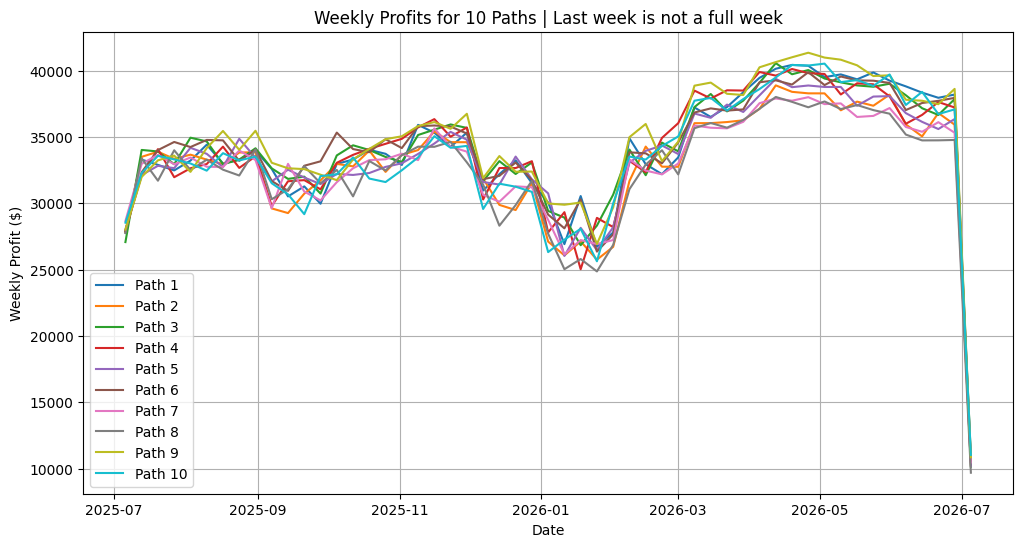

In [22]:
import matplotlib.pyplot as plt

# Select 10 paths to plot
sample_paths = weekly_profits.iloc[:, :10]

# Plot the weekly profits for the selected paths
plt.figure(figsize=(12, 6))
for i in range(sample_paths.shape[1]):
    plt.plot(sample_paths.index, sample_paths.iloc[:, i], label=f'Path {i+1}')

plt.title('Weekly Profits for 10 Paths | Last week is not a full week')
plt.xlabel('Date')
plt.ylabel('Weekly Profit ($)')
plt.legend()
plt.grid()
plt.show()

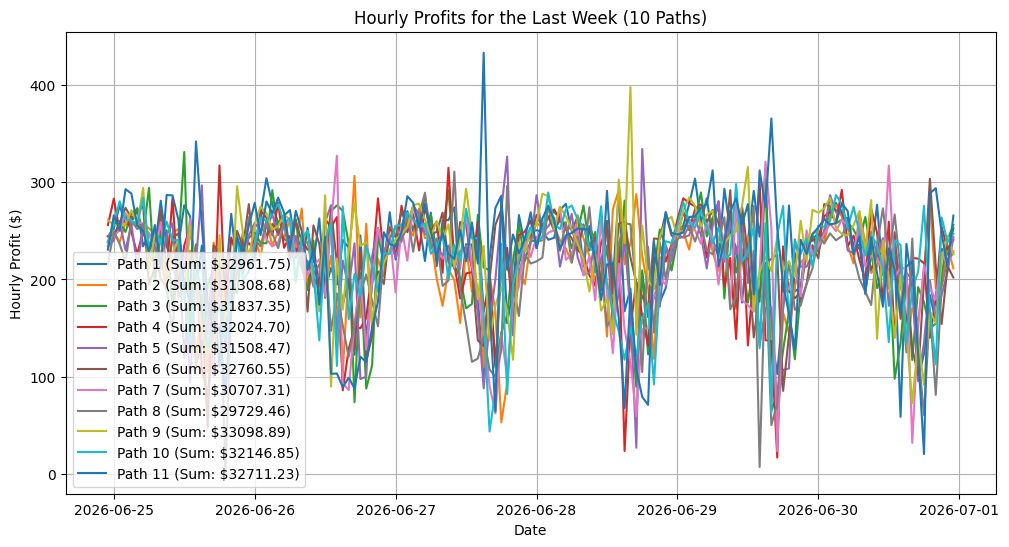

In [23]:
# Select the last week of hourly profits for the first 10 paths
last_week_start = rng[-1] - pd.Timedelta(days=6)
last_week_end = rng[-1]
last_week_data = hourly_profits_df.loc[last_week_start:last_week_end, :10]

# Calculate the sum of profits for each path for the last week
path_sums = last_week_data.sum()

# Plot the hourly profits for the last week
plt.figure(figsize=(12, 6))
for i in range(last_week_data.shape[1]):
    plt.plot(last_week_data.index, last_week_data.iloc[:, i], label=f'Path {i+1} (Sum: ${path_sums[i]:.2f})')

plt.title('Hourly Profits for the Last Week (10 Paths)')
plt.xlabel('Date')
plt.ylabel('Hourly Profit ($)')
plt.legend()
plt.grid()
plt.show()

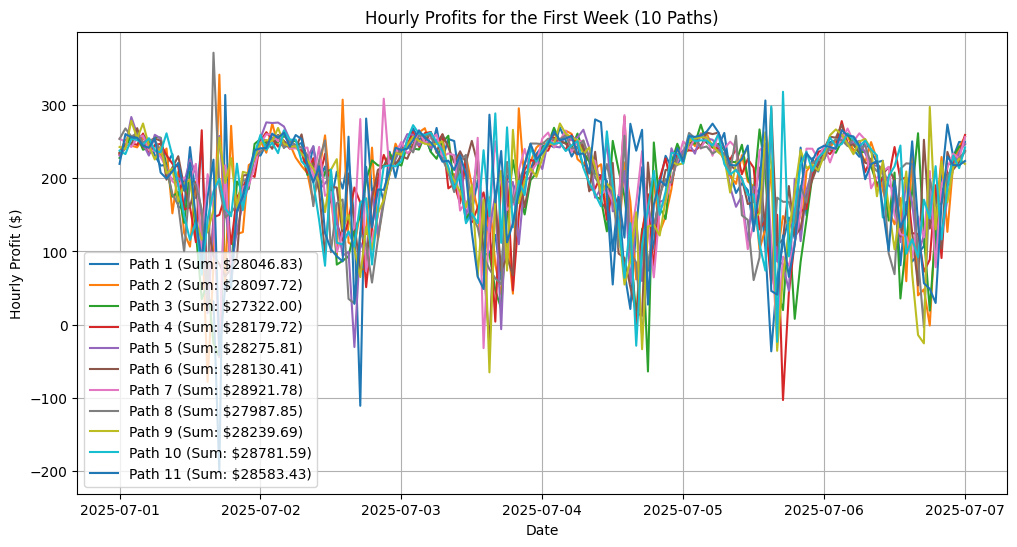

In [24]:
# Select the first week of hourly profits for the first 10 paths
first_week_start = rng[0]
first_week_end = rng[0] + pd.Timedelta(days=6)
first_week_data = hourly_profits_df.loc[first_week_start:first_week_end, :10]

# Calculate the sum of profits for each path for the first week
path_sums_first_week = first_week_data.sum()

# Plot the hourly profits for the first week
plt.figure(figsize=(12, 6))
for i in range(first_week_data.shape[1]):
    plt.plot(first_week_data.index, first_week_data.iloc[:, i], label=f'Path {i+1} (Sum: ${path_sums_first_week[i]:.2f})')

plt.title('Hourly Profits for the First Week (10 Paths)')
plt.xlabel('Date')
plt.ylabel('Hourly Profit ($)')
plt.legend()
plt.grid()
plt.show()